1. EVALUATING FEW LINEAR REGRESSION MODELS WITH KFOLD CROSS VALIDATION METHOD (LINEAR, RANDOM FOREST REGRESSION, LASSO , RIDGE)
2. HYPERTUNING PARAMETERS TO OBTAIN BEST MODEL THROUGH GRID SEARCH CV - SVR (LINEAR KERNEL)
3. HYPERTUNING PARAMETERS TO OBTAIN BEST MODEL THROUGH RANDOMIZED SEARCH CV ON RANDOM FOREST REGRESSION
4. HYPERTUNING PARAMETERS TO OBTAIN BEST MODEL THROUGH GRID SEARCH CV ON LASSO LINEAR REGRESSION


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import datetime as datetime

Loading the Dataset

In [5]:
data = pd.read_csv('well_cleaned.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.fillna(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5943 entries, 0 to 5942
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL_BORE_CODE            5943 non-null   object 
 1   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 2   AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 3   AVG_CHOKE_SIZE_P          5943 non-null   float64
 4   AVG_WHP_P                 5943 non-null   float64
 5   AVG_WHT_P                 5943 non-null   float64
 6   DP_CHOKE_SIZE             5943 non-null   float64
 7   BORE_OIL_VOL              5943 non-null   float64
 8   BORE_GAS_VOL              5943 non-null   float64
 9   BORE_WAT_VOL              5943 non-null   float64
 10  FLOW_KIND                 5943 non-null   object 
 11  WELL_TYPE                 5943 non-null   object 
dtypes: float64(9), object(3)
memory usage: 557.3+ KB


In [42]:
#Getting only the desired input variables into a dataframe
df = data.loc[:, 'AVG_CHOKE_SIZE_P':'BORE_WAT_VOL']
df = df.drop(['DP_CHOKE_SIZE'],axis=1)

feature_names= df.columns
df

,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,43.34,107.36,37.94,631.47,90439.09,0.00
1,47.17,99.19,60.76,1166.46,165720.39,0.00
2,47.73,94.60,63.05,1549.81,221707.31,0.00
3,48.53,89.99,64.55,1248.70,178063.52,0.00
4,49.84,84.78,65.72,1345.78,192602.19,0.00
...,...,...,...,...,...,...
5938,31.58,15.81,49.02,144.01,23201.35,203.93
5939,31.54,15.77,48.99,145.22,23068.07,202.93
5940,31.52,15.70,50.10,142.74,23059.68,203.84
5941,31.52,15.61,49.84,144.46,23090.47,202.76


In [7]:
X = df
y = data['AVG_DOWNHOLE_PRESSURE'].values.reshape(-1,1)

Split into Train and Test Data Set and performing Scaling

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
X_train_s = x_scaler.fit_transform(X_train)
X_test_s = x_scaler.transform(X_test)

In [10]:
from sklearn.preprocessing import StandardScaler
y_scaler = StandardScaler()
y_train_s = y_scaler.fit_transform(y_train)
y_test_s = y_scaler.transform(y_test)

1. EVALUATING FEW LINEAR REGRESSION MODELS WITH KFOLD CROSS VALIDATION METHOD (LINEAR, RANDOM FOREST REGRESSION, LASSO , RIDGE)

Simple multi Lienar Regression

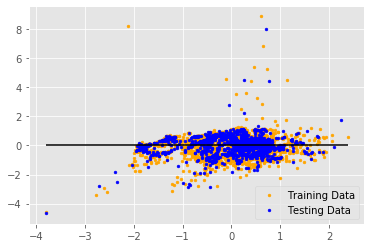

Mean Squared Error (MSE) Train Data: 0.4104764730468125
R-squared (R2) Train Data: 0.5895235269531875
-----------------------------------
Mean Squared Error (MSE) Test Data: 0.41490932151903154
R-squared (R2) Test Data: 0.5781442928698933


In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.preprocessing import StandardScaler
model.fit(X_train_s, y_train_s)


# Plot the Residuals for the Training and Testing data
predictions = model.predict(X_train_s)
predictions1 = model.predict(X_test_s)

# Plot Residuals
plt.scatter(predictions.reshape(-1,1), predictions.reshape(-1,1) - y_train_s, c= "orange",label="Training Data", s=8)
plt.scatter(predictions1.reshape(-1,1), predictions1.reshape(-1,1) - y_test_s, c= "blue",label="Testing Data",s=8)
#plt.ylim(-2,2)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.legend()
plt.show()

# Model Scores
# Score the prediction with mse and r2

from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(y_train_s, predictions)
r2_train = r2_score(y_train_s, predictions)
mse_test = mean_squared_error(y_test_s, predictions1)
r2_test = r2_score(y_test_s, predictions1)

print(f"Mean Squared Error (MSE) Train Data: {mse_train}")
print(f"R-squared (R2) Train Data: {r2_train}")
print("-----------------------------------")
print(f"Mean Squared Error (MSE) Test Data: {mse_test}")
print(f"R-squared (R2) Test Data: {r2_test}")




UNDERSTANDING KFOLD METHOD

In [76]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)
kf


KFold(n_splits=3, random_state=None, shuffle=False)

In [77]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [78]:
def get_score(model, X_train_s, X_test_s, y_train_s,y_test):
    model.fit(X_train_s,y_train_s)
    return model.score(X_test_s,y_test_s)

In [81]:
#Starteifed Fold: Divides each of the classification category in unique way
from sklearn.model_selection import StratifiedKFold
stratifedKFold = KFold(n_splits = 3)

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

scores_lm=[]
scores_rf=[]
scores_ridge=[]
scores_lasso=[]

for train_index, test_index in kf.split(X_test_s):
    X_train, X_test, y_train, y_test =  X_train_s, X_test_s, y_train_s, y_test_s
    scores_lm.append(get_score(LinearRegression(), X_train_s, X_test_s, y_train_s, y_test_s))
    scores_rf.append(get_score(RandomForestRegressor(), X_train_s, X_test_s, y_train_s, y_test_s))
    scores_lasso.append(get_score(Lasso(), X_train_s, X_test_s, y_train_s, y_test_s))
    scores_ridge.append(get_score(Ridge(), X_train_s, X_test_s, y_train_s, y_test_s))

C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [91]:
print(f"Scores for Linear Regression are: {scores_lm}")
print(f"Scores for Random Forest Regression are: {scores_rf}")
print(f"Scores for Lasso Regression are: {scores_lasso}")
print(f"Scores for Ridge Regression are: {scores_ridge}")

Scores for Linear Regression are: [0.5781442928698933, 0.5781442928698933, 0.5781442928698933]
Scores for Random Forest Regression are: [0.8248944962264574, 0.8048011953147411, 0.8295358792614923]
Scores for Lasso Regression are: [-0.0002267202600065854, -0.0002267202600065854, -0.0002267202600065854]
Scores for Ridge Regression are: [0.578627760224098, 0.578627760224098, 0.578627760224098]


CALCULATING MAX CV SCORES ON EACH MODEL USING CROSS VALIDATION

In [115]:
model = [LinearRegression(),RandomForestRegressor(),Ridge(),Lasso()]
score =[]
cv=0
max_score = 0
for model in model:
    for i in range(2,11):
        score=cross_val_score(model, X_train_s, y_train_s,cv = i)
        if max_score < max(score):
            max_score = max(score)
            cv = i
    print(f"Maximum R2 score for {model} is {max_score} at cv = {cv}")

Maximum R2 score for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 0.6512412477791976 at cv = 10


C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_va

C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_va

Maximum R2 score for RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) is 0.9538754207773121 at cv = 9
Maximum R2 score for Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) is 0.9538754207773121 at cv = 9
Maximum R2 score for Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is 0.9538754207773121 at cv = 9


In [100]:
from sklearn.model_selection import cross_val_score
for i in range (2,10):
    
    print(f"Linear Regression for cv={i} : {cross_val_score(LinearRegression(), X_train_s, y_train_s,cv = i)}")
    print(f"Random Forest Regression for cv={i} : {cross_val_score(RandomForestRegressor(), X_train_s, y_train_s,cv = i)}")
    print(f"Ridge Regression for cv={i} : {cross_val_score(Ridge(), X_train_s, y_train_s,cv = i)}")
    print(f"Lasso Regression for cv={i} : {cross_val_score(Lasso(), X_train_s, y_train_s,cv = i)}")


Linear Regression for cv=2 : [0.59085354 0.58362565]


C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Random Forest Regression for cv=2 : [0.84725356 0.82286525]
Ridge Regression for cv=2 : [0.59041609 0.58350768]
Lasso Regression for cv=2 : [-0.00098905 -0.00102479]
Linear Regression for cv=3 : [0.58457783 0.58510091 0.59454127]


C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Random Forest Regression for cv=3 : [0.83602779 0.8561064  0.86669158]
Ridge Regression for cv=3 : [0.58390865 0.58496179 0.59487641]
Lasso Regression for cv=3 : [-2.41608170e-03 -2.10067013e-05 -2.14351983e-03]
Linear Regression for cv=4 : [0.57007855 0.61278949 0.54973335 0.62155   ]


C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_va

Random Forest Regression for cv=4 : [0.81848933 0.88777077 0.75893738 0.90751119]
Ridge Regression for cv=4 : [0.56909544 0.61371866 0.54910705 0.62235961]
Lasso Regression for cv=4 : [-3.19820336e-03 -2.59536370e-04 -1.28333184e-05 -2.28068897e-03]
Linear Regression for cv=5 : [0.55319537 0.62352448 0.57143619 0.57840391 0.61392776]


C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_va

Random Forest Regression for cv=5 : [0.79621849 0.93426961 0.82460524 0.84303137 0.90599568]
Ridge Regression for cv=5 : [0.5525918  0.62381683 0.57199251 0.57720312 0.61464045]
Lasso Regression for cv=5 : [-0.00323645 -0.00157584 -0.00418819 -0.00022183 -0.0023471 ]
Linear Regression for cv=6 : [0.59052176 0.57822903 0.60541019 0.56518    0.55531554 0.62952785]


C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_va

Random Forest Regression for cv=6 : [0.90522624 0.79055484 0.87750192 0.83792034 0.80452809 0.90049783]
Ridge Regression for cv=6 : [0.59034156 0.57750407 0.60581649 0.56461989 0.55469491 0.63075894]
Lasso Regression for cv=6 : [-6.18604137e-03 -2.33513572e-05 -5.26413834e-04 -2.32208934e-04
 -1.97886044e-04 -7.75169759e-03]
Linear Regression for cv=7 : [0.59751198 0.55283141 0.5834069  0.58582277 0.55419732 0.62936549
 0.61564385]


C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_va

Random Forest Regression for cv=7 : [0.93886819 0.74373112 0.8589876  0.83088795 0.82475875 0.93407673
 0.89993763]
Ridge Regression for cv=7 : [0.59759837 0.55151649 0.58517478 0.58562529 0.55373119 0.62826981
 0.61714327]
Lasso Regression for cv=7 : [-5.69722444e-03 -1.11889758e-03 -1.29677644e-06 -2.31354428e-03
 -2.54887719e-04 -8.48312338e-05 -7.35372152e-03]
Linear Regression for cv=8 : [0.60744534 0.54163532 0.623557   0.60124089 0.56387683 0.53536663
 0.62989965 0.61339635]


C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_va

Random Forest Regression for cv=8 : [0.94380527 0.73188682 0.92608248 0.86653912 0.82842452 0.78311245
 0.91822426 0.91584926]
Ridge Regression for cv=8 : [0.60805388 0.54007942 0.62443776 0.60169787 0.56407946 0.53424474
 0.62939143 0.61509731]
Lasso Regression for cv=8 : [-4.93682131e-03 -9.30546530e-04 -3.63035726e-03 -7.49098981e-03
 -5.15400857e-04 -8.65838555e-04 -3.34917161e-05 -5.60191383e-03]
Linear Regression for cv=9 : [0.64880422 0.49277805 0.64580643 0.5718096  0.57418397 0.60459033
 0.5553694  0.60161652 0.62501855]


C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_va

Random Forest Regression for cv=9 : [0.92494718 0.69020253 0.93408882 0.85687541 0.79586199 0.95009419
 0.76713186 0.92168894 0.904189  ]
Ridge Regression for cv=9 : [0.64807602 0.49217725 0.6458429  0.57288098 0.57356553 0.60399674
 0.55503273 0.60108907 0.62672247]
Lasso Regression for cv=9 : [-0.00586137 -0.00030719 -0.00046431 -0.0002382  -0.0109069  -0.00736692
 -0.000965   -0.00011146 -0.00674293]


2. SVR - GRID SEARCH CV

In [11]:
# Create the SVC Model
from sklearn.svm import SVR
model = SVR(kernel='linear')
model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [12]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

In [13]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.5min finished
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [14]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [15]:
# List the best score
print(grid.best_score_)

0.5732050942195801


Text(0.5, 1.0, 'Residual Plot')

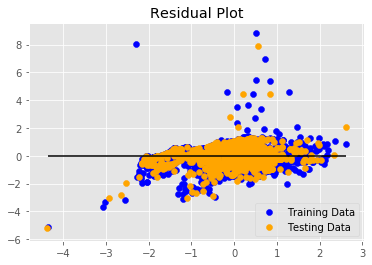

In [17]:
# Plot the Residuals for the Training and Testing data

predictions = grid.predict(X_train_s).reshape(-1,1)
predictions1 = grid.predict(X_test_s).reshape(-1,1)
plt.scatter(grid.predict(X_train_s).reshape(-1,1), grid.predict(X_train_s).reshape(-1,1) - y_train_s, c="blue", label="Training Data")
plt.scatter(grid.predict(X_test_s).reshape(-1,1), grid.predict(X_test_s).reshape(-1,1) - y_test_s, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
#plt.xlim(-2,2)
plt.title("Residual Plot")

3. RANDOMIZED SEARCHCV -RANDOM FOREST REGRESSION

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Most important Parameters in Random Forest Search that we will tune through hyperparameter tuning

n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

RANDOM HYPERPARAMETER GRID
To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [23]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

#On each iteration, the algorithm will choose a difference combination of the features. 
#Altogether, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 settings! 
#However, the benefit of a random search is that we are not trying every combination, 
#but selecting at random to sample a wide range of values.

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [24]:
#Instantiate the random search and fit it like any Scikit-Learn model:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_s,y_train_s)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 24.9min finished
C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [222]:
#Best estimators from fitting the random search:
best_parameter_rf = rf_random.best_params_
best_parameter_rf

{'n_estimators': 522,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [210]:
#Scores from Random Search
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = rf_random.predict(X_test_s)
# YOUR CODE HERE
# Score the prediction with mse and r2
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.12559276364737693
R-squared (R2 ): 0.8723045702494339


The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [211]:
#Best parameters from fitting the random search:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=110, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=522, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [212]:
#Evaluate Random Search
#To determine if random search yielded a better model, we compare the base model with the best random search model.

def evaluate(model, X_test_s, y_test_s):
    model.fit(X_train_s, y_train_s)
    predictions = model.predict(X_test_s)
    errors = abs(predictions - y_test_s)
    # Score the prediction with mse and r2
    mse = mean_squared_error(y_test_s, predictions)
    r2 = r2_score(y_test_s, predictions)
    mape = 100 * np.mean(errors / y_test_s)
    accuracy = 100 - mape
    print('Model Performance')
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2 ): {r2}")
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("_________________")
    return accuracy

#Base model evaluation
base_model = RandomForestRegressor(n_estimators = 100, max_depth = 100)
#base_model.fit(X_train_s, y_train_s)
base_accuracy = evaluate(base_model, X_test_s, y_test_s)

#Best Random model evaluation
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_s, y_test_s)

#Improvement
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
print(best_random.feature_importances_,feature_names)

C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Model Performance
Mean Squared Error (MSE): 0.17241049618066653
R-squared (R2 ): 0.8247030182000588
Average Error: 1.0998 degrees.
Average Error: 1.0998 degrees.
Accuracy = -5517.61%.
_________________


C:\Users\RAKHI\Anaconda3\envs\mlproject\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Model Performance
Mean Squared Error (MSE): 0.12480383126538175
R-squared (R2 ): 0.8731067108874555
Average Error: 1.0845 degrees.
Average Error: 1.0845 degrees.
Accuracy = -5374.58%.
_________________
Improvement of -2.59%.
[0.15377512 0.25688974 0.20451258 0.08827276 0.09892352 0.19762628] ['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']


In [215]:
#Feature importances
importances_random = best_random.feature_importances_ 
sorted(zip(importances_random,feature_names),reverse = True)


[(0.2568897423054892, 'AVG_WHP_P'),
 (0.20451257711131457, 'AVG_WHT_P'),
 (0.19762628159491794, 'BORE_WAT_VOL'),
 (0.15377512309577596, 'AVG_CHOKE_SIZE_P'),
 (0.09892351910984025, 'BORE_GAS_VOL'),
 (0.08827275678266217, 'BORE_OIL_VOL')]

In [278]:
sorted(importances_random,reverse=True)

[0.2568897423054892,
 0.20451257711131457,
 0.19762628159491794,
 0.15377512309577596,
 0.09892351910984025,
 0.08827275678266217]

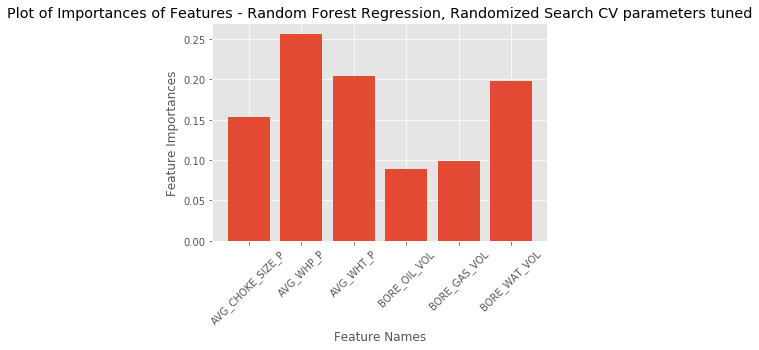

In [292]:
#Plot of feture coefficients
plt.bar(feature_names,importances_random)
plt.title("Plot of Importances of Features - Random Forest Regression, Randomized Search CV parameters tuned")
plt.xticks(rotation=45)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importances')


Residual Plot with Best Hyperparameters - RANDOMIZED SEARCH CV 


Text(0.5, 1.0, 'Residual Plot Random Forest Regression-Base Model')

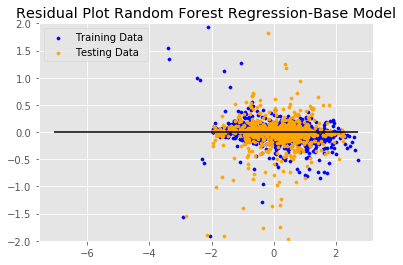

In [225]:
# Plot the Residuals for the Training and Testing data-Parameters Tuned-Base Model
model = base_model
predictions = model.predict(X_train_s)
predictions1 = model.predict(X_test_s)

plt.scatter(model.predict(X_train_s), model.predict(X_train_s) - y_train_s.ravel(), c="blue",s=10, label="Training Data")
plt.scatter(model.predict(X_test_s), model.predict(X_test_s) - y_test_s.ravel(), c="orange",s=10, label="Testing Data")
plt.legend()
plt.ylim(-2,2)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot Random Forest Regression-Base Model")


Best parameters used{'n_estimators': 522, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}


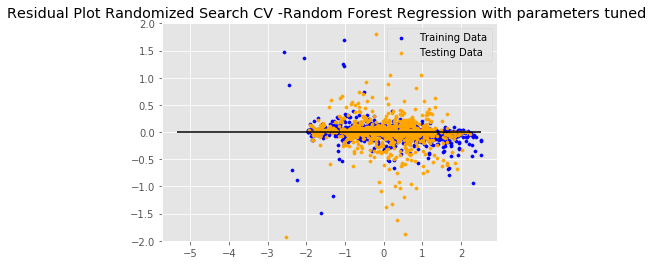

In [224]:
# Plot the Residuals for the Training and Testing data-Parameters Tuned
model = best_random
predictions = model.predict(X_train_s)
predictions1 = model.predict(X_test_s)

plt.scatter(model.predict(X_train_s), model.predict(X_train_s) - y_train_s.ravel(), c="blue",s=10, label="Training Data")
plt.scatter(model.predict(X_test_s), model.predict(X_test_s) - y_test_s.ravel(), c="orange",s=10, label="Testing Data")
plt.legend()
plt.ylim(-2,2)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot Randomized Search CV -Random Forest Regression with parameters tuned ")

print(f"Best parameters used{best_parameter_rf}")

GRID SEARCH WITH CROSS VALIDATION

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:


##PERSONAL REFERENCE
Grid Search CV

Here we create grid_param dictionary with three parameters n_estimators, criterion, and bootstrap. The parameter values that we want to try out are passed in the list. For instance, in the above script we want to find which value (out of 100, 300, 500, 800, and 1000) provides the highest accuracy.

Similarly, we want to find which value results in the highest performance for the criterion parameter: "gini" or "entropy"? The Grid Search algorithm basically tries all possible combinations of parameter values and returns the combination with the highest accuracy. For instance, in the above case the algorithm will check 20 combinations (5 x 2 x 2 = 20).

The Grid Search algorithm can be very slow, owing to the potentially huge number of combinations to test. Furthermore, cross validation further increases the execution time and complexity.

##Please disregard this cell:
from sklearn.model_selection import GridSearchCV
#Create the parameter grid based on the results of random search 

param_grid={'bootstrap': [True],
                    'max_depth': [100, 110, None],
                    'max_features': [2,3],
                    'min_samples_leaf': [1, 2, 3],
                    'min_samples_split': [2, 5, 10],
                    'n_estimators': [1600,1800, 2000]},

#Create a based model
rf = RandomForestRegressor()
#Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

#This will try out 1 * 3 * 2 * 3 * 3 * 3 = 162 combinations of settings.
#We can fit the model, display the best hyperparameters, and evaluate performance.

#Fit the grid search to the data
grid_search.fit(X_train_s, y_train_s)
grid_search.best_params_

#Evaluate GridSearchCV
#To determine if GridSearch yielded a better model, we compare the base model with the best Grid search model.
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_s, y_test_s)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


4. GRID SEARCH CV - LASSO REGRESSION

In [202]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

lasso_params = {'alpha':np.arange(0.001, 0.5, 0.001),
               'max_iter':[1000,5000,10000],
               'tol':np.arange(0.00001, 0.01, 0.005)}

# Create a base model
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01, normalize=False)
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print(f"R2 Score: {score}")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = lasso_params, cv = 3, n_jobs = -1, verbose = 2)

R2 Score: 0.577877408633938


In [203]:
#Base parameters
model.get_params

<bound method BaseEstimator.get_params of Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>

In [204]:
# Fit the grid search to the data
grid_search.fit(X_train_s, y_train_s)
best_parameter_Lasso = grid_search.best_params_
best_parameter_Lasso

Fitting 3 folds for each of 2994 candidates, totalling 8982 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 3896 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 8982 out of 8982 | elapsed:   12.9s finished


{'alpha': 0.001, 'max_iter': 5000, 'tol': 1e-05}

In [205]:
#Base model evaluation
base_model = Lasso(alpha=0.1, normalize=False)
base_accuracy = evaluate(base_model, X_test_s, y_test_s)

#Evaluate GridSearchCV
#To determine if GridSearch yielded a better model, we compare the base model with the best Grid search model.
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_s, y_test_s)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Model Performance
Mean Squared Error (MSE): 0.5299432795735386
R-squared (R2 ): 0.46118444356741584
Average Error: 0.8975 degrees.
Average Error: 0.8975 degrees.
Accuracy = -2761.21%.
_________________
Model Performance
Mean Squared Error (MSE): 0.4142533390099713
R-squared (R2 ): 0.5788112577966187
Average Error: 0.9979 degrees.
Average Error: 0.9979 degrees.
Accuracy = -4232.19%.
_________________
Improvement of 53.27%.


In [206]:
#Feature importances
importances_lasso = best_grid.coef_
sorted(zip(importances_lasso,feature_names),reverse = True)

[(0.8522862334924205, 'AVG_WHP_P'),
 (0.41611383647321376, 'BORE_OIL_VOL'),
 (0.32593825137102933, 'AVG_CHOKE_SIZE_P'),
 (0.317862255229673, 'BORE_WAT_VOL'),
 (0.30490647153072953, 'AVG_WHT_P'),
 (-0.8515251984044433, 'BORE_GAS_VOL')]

Text(0, 0.5, 'Feature Coefficients')

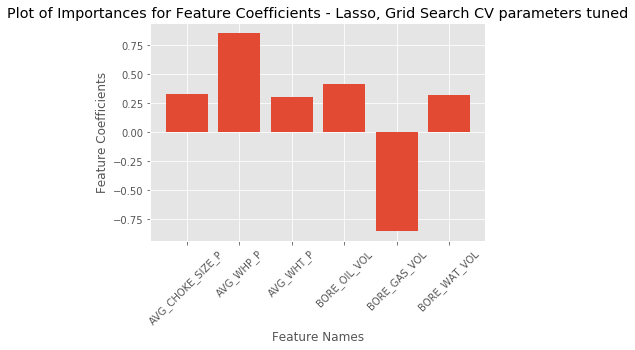

In [207]:
#Plot of feture coefficients
plt.bar(feature_names,importances_lasso)
plt.title("Plot of Importances for Feature Coefficients - Lasso, Grid Search CV parameters tuned")
plt.xticks(rotation=45)
plt.xlabel('Feature Names')
plt.ylabel('Feature Coefficients')

Residual Plot with Best Hyperparameters - GRID SEARCH CV LASSO

Best parameters used{'alpha': 0.001, 'max_iter': 5000, 'tol': 1e-05}


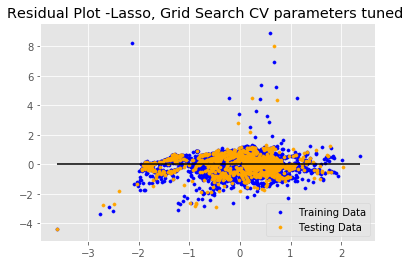

In [226]:
# Plot the Residuals for the Training and Testing data
model = best_grid
predictions = model.predict(X_train_s)
predictions1 = model.predict(X_test_s)

plt.scatter(model.predict(X_train_s), model.predict(X_train_s) - y_train_s.ravel(), s=10,c="blue", label="Training Data")
plt.scatter(model.predict(X_test_s), model.predict(X_test_s) - y_test_s.ravel(), s=10,c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot -Lasso, Grid Search CV parameters tuned ")

print(f"Best parameters used{best_parameter_Lasso}")

In [230]:
#PLOTTING THE FEATURES VERSUS DOWNHOLEPRESSURE FOR EACH WELL AND CUMULATIVE
x=data.loc[:, 'AVG_CHOKE_SIZE_P':'BORE_WAT_VOL']
x = x.drop(['DP_CHOKE_SIZE'],axis=1)
y=data['AVG_DOWNHOLE_PRESSURE']

,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,43.34,107.36,37.94,631.47,90439.09,0.00
1,47.17,99.19,60.76,1166.46,165720.39,0.00
2,47.73,94.60,63.05,1549.81,221707.31,0.00
3,48.53,89.99,64.55,1248.70,178063.52,0.00
4,49.84,84.78,65.72,1345.78,192602.19,0.00
...,...,...,...,...,...,...
5938,31.58,15.81,49.02,144.01,23201.35,203.93
5939,31.54,15.77,48.99,145.22,23068.07,202.93
5940,31.52,15.70,50.10,142.74,23059.68,203.84
5941,31.52,15.61,49.84,144.46,23090.47,202.76


In [232]:
sorted(zip(importances_random,feature_names),reverse = True)

[(0.2568897423054892, 'AVG_WHP_P'),
 (0.20451257711131457, 'AVG_WHT_P'),
 (0.19762628159491794, 'BORE_WAT_VOL'),
 (0.15377512309577596, 'AVG_CHOKE_SIZE_P'),
 (0.09892351910984025, 'BORE_GAS_VOL'),
 (0.08827275678266217, 'BORE_OIL_VOL')]

In [233]:
data['WELL_BORE_CODE'].unique()

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D'], dtype=object)

In [257]:
array_wells = data['WELL_BORE_CODE'].unique()
data.loc[data['WELL_BORE_CODE']=='NO 15/9-F-1 C']
array_wells

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D'], dtype=object)

In [276]:
def color_plot(well):
    cols=[]
    for l in well:
        if l == 'NO 15/9-F-1 C':
            cols.append('Red') 
        if l == 'NO 15/9-F-11 H':
            cols.append('Green') 
        if l == 'NO 15/9-F-12 H':
            cols.append('Blue') 
        if l == 'NO 15/9-F-14 H':
            cols.append('Orange') 
        if l == 'NO 15/9-F-15 D':
            cols.append('Yellow')
    return(cols)

cols = color_plot(df_well['WELL_BORE_CODE'])

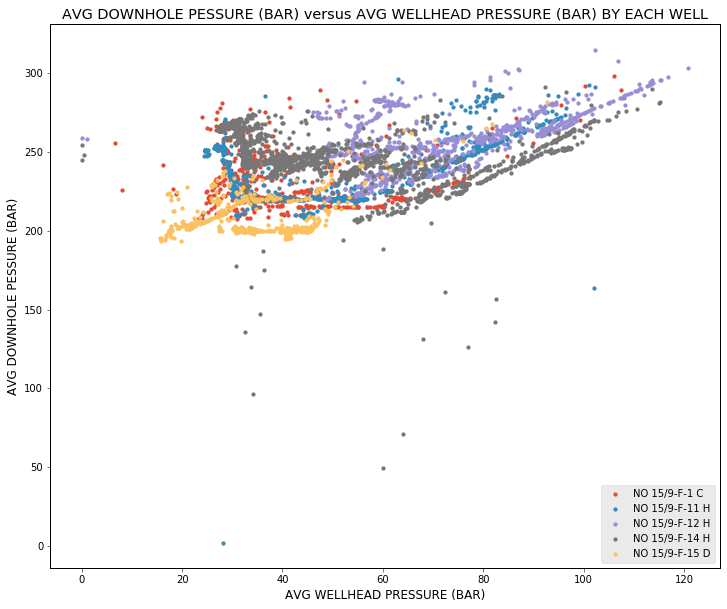

In [347]:
#Plot downhole pressure versus 'AVG_WHP_P' - By Each Well
plt.subplots(figsize=(12,10),facecolor='white')

ax = plt.axes()
ax.set_facecolor("white")

for well in array_wells:
    df_well = data.loc[data['WELL_BORE_CODE']==well]
    plt.scatter(df_well['AVG_WHP_P'], df_well['AVG_DOWNHOLE_PRESSURE'], label = well, linewidth=2, s = 5)

plt.title('AVG DOWNHOLE PESSURE (BAR) versus AVG WELLHEAD PRESSURE (BAR) BY EACH WELL',color='black')
plt.ylabel('AVG DOWNHOLE PESSURE (BAR)',color='black')
plt.xlabel('AVG WELLHEAD PRESSURE (BAR)',color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.legend(loc='lower right')
plt.rc('axes',edgecolor='black')

plt.savefig('whp_each_well.png')

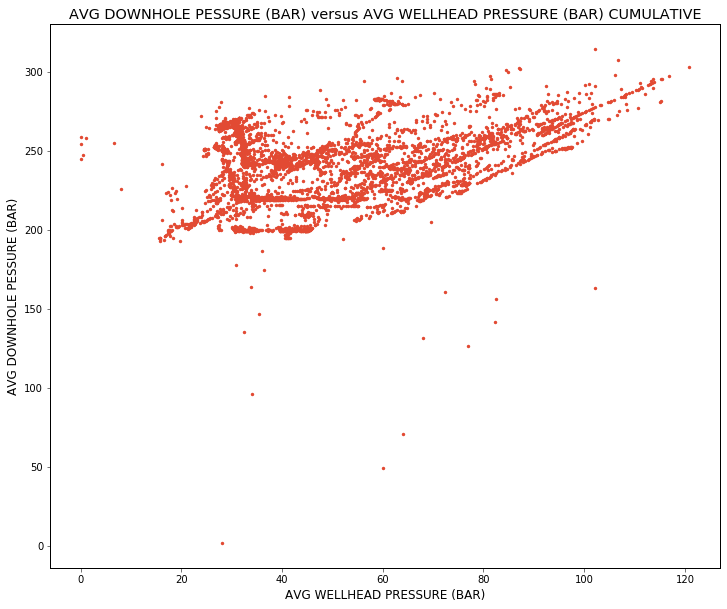

In [348]:
#Plot downhole pressure versus 'AVG_WHP_P' - All wells
plt.subplots(figsize=(12,10),facecolor='white')

ax = plt.axes()
ax.set_facecolor("white")

plt.scatter(data['AVG_WHP_P'], data['AVG_DOWNHOLE_PRESSURE'], linewidth=2, s = 2)
plt.title('AVG DOWNHOLE PESSURE (BAR) versus AVG WELLHEAD PRESSURE (BAR) CUMULATIVE',color='black')
plt.ylabel('AVG DOWNHOLE PESSURE (BAR)',color='black')
plt.xlabel('AVG WELLHEAD PRESSURE (BAR)',color='black')
plt.xticks(color='black')
plt.yticks(color='black')
#plt.legend(loc='lower right')
plt.rc('axes',edgecolor='black')

plt.savefig('whp_all_well.png')

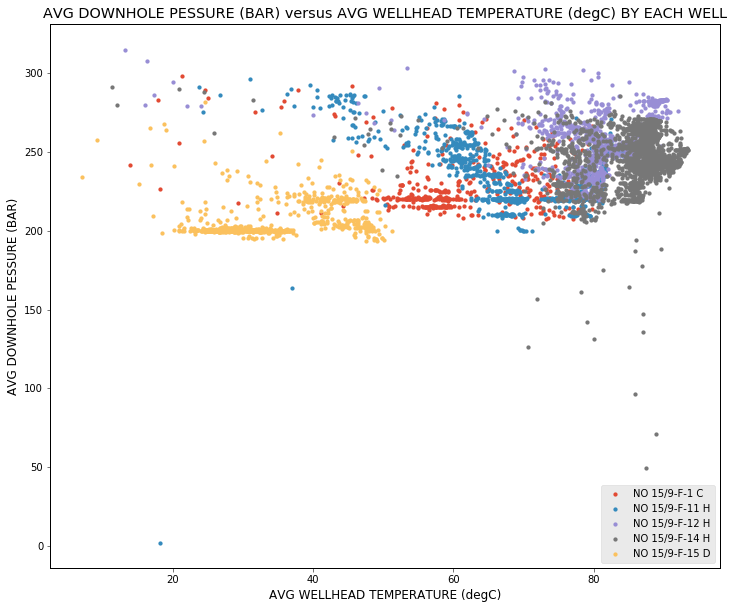

In [349]:
#Plot downhole pressure versus 'AVG_WHT_P' - By Each Well

plt.subplots(figsize=(12,10),facecolor='white')

ax = plt.axes()
ax.set_facecolor("white")

for well in array_wells:
    df_well = data.loc[data['WELL_BORE_CODE']==well]
    plt.scatter(df_well['AVG_WHT_P'], df_well['AVG_DOWNHOLE_PRESSURE'], label = well, linewidth=2, s = 5)

plt.title('AVG DOWNHOLE PESSURE (BAR) versus AVG WELLHEAD TEMPERATURE (degC) BY EACH WELL',color='black')
plt.ylabel('AVG DOWNHOLE PESSURE (BAR)',color='black')
plt.xlabel('AVG WELLHEAD TEMPERATURE (degC)',color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.legend(loc='lower right')
plt.rc('axes',edgecolor='black')

plt.savefig('wht_each_well.png')

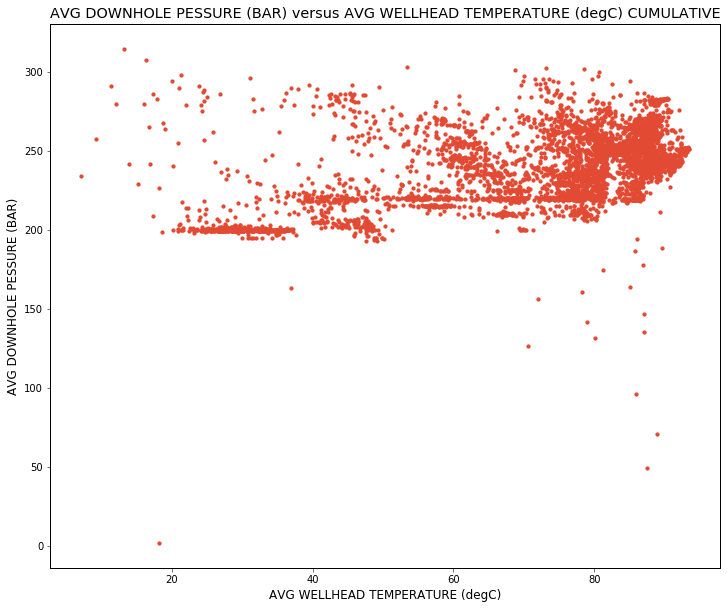

In [350]:
#Plot downhole pressure versus 'AVG_WHT_P' - All wells

plt.subplots(figsize=(12,10),facecolor='white')

ax = plt.axes()
ax.set_facecolor("white")

plt.scatter(data['AVG_WHT_P'], data['AVG_DOWNHOLE_PRESSURE'], linewidth=2, s = 5)
plt.title('AVG DOWNHOLE PESSURE (BAR) versus AVG WELLHEAD TEMPERATURE (degC) CUMULATIVE',color='black')
plt.ylabel('AVG DOWNHOLE PESSURE (BAR)',color='black')
plt.xlabel('AVG WELLHEAD TEMPERATURE (degC)',color='black')
plt.xticks(color='black')
plt.yticks(color='black')
#plt.legend(loc='lower right')
plt.rc('axes',edgecolor='black')

plt.savefig('wht_all_well.png')

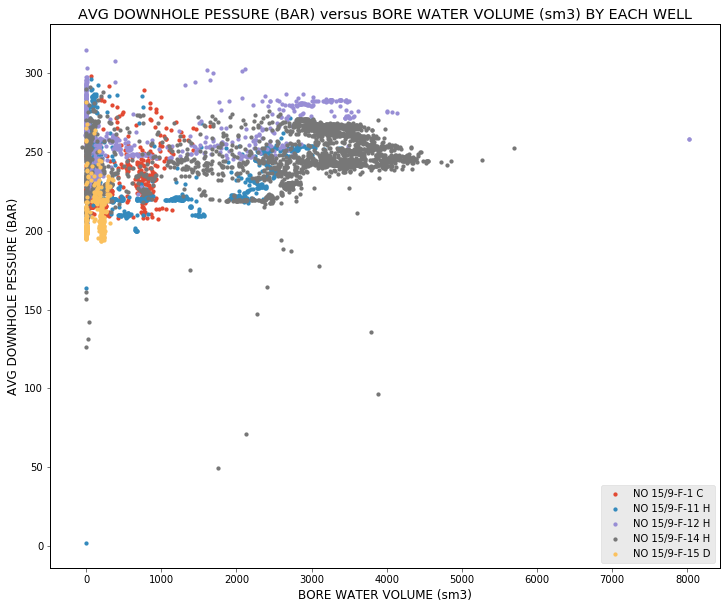

In [351]:
#Plot downhole pressure versus 'BORE_WAT_VOL' - By Each Well

plt.subplots(figsize=(12,10),facecolor='white')

ax = plt.axes()
ax.set_facecolor("white")

for well in array_wells:
    df_well = data.loc[data['WELL_BORE_CODE']==well]
    plt.scatter(df_well['BORE_WAT_VOL'], df_well['AVG_DOWNHOLE_PRESSURE'], label = well, linewidth=2, s = 5)

plt.title('AVG DOWNHOLE PESSURE (BAR) versus BORE WATER VOLUME (sm3) BY EACH WELL',color='black')
plt.ylabel('AVG DOWNHOLE PESSURE (BAR)',color='black')
plt.xlabel('BORE WATER VOLUME (sm3)',color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.legend(loc='lower right')
plt.rc('axes',edgecolor='black')

plt.savefig('wat_each_well.png')

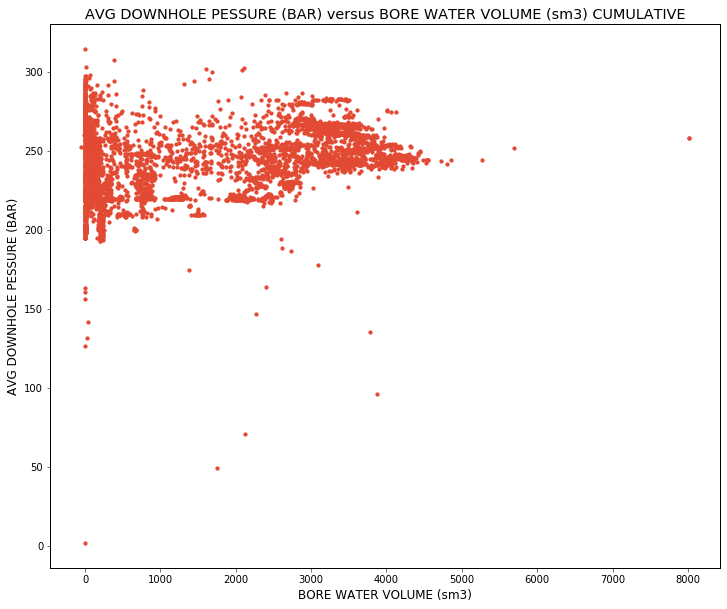

In [352]:
#Plot downhole pressure versus 'BORE_WAT_VOL' - All wells

plt.subplots(figsize=(12,10),facecolor='white')

ax = plt.axes()
ax.set_facecolor("white")

plt.scatter(data['BORE_WAT_VOL'], data['AVG_DOWNHOLE_PRESSURE'], linewidth=2, s = 5)
plt.title('AVG DOWNHOLE PESSURE (BAR) versus BORE WATER VOLUME (sm3) CUMULATIVE',color='black')
plt.ylabel('AVG DOWNHOLE PESSURE (BAR)',color='black')
plt.xlabel('BORE WATER VOLUME (sm3)',color='black')
plt.xticks(color='black')
plt.yticks(color='black')
#plt.legend(loc='lower right')
plt.rc('axes',edgecolor='black')

plt.savefig('wat_all_well.png')

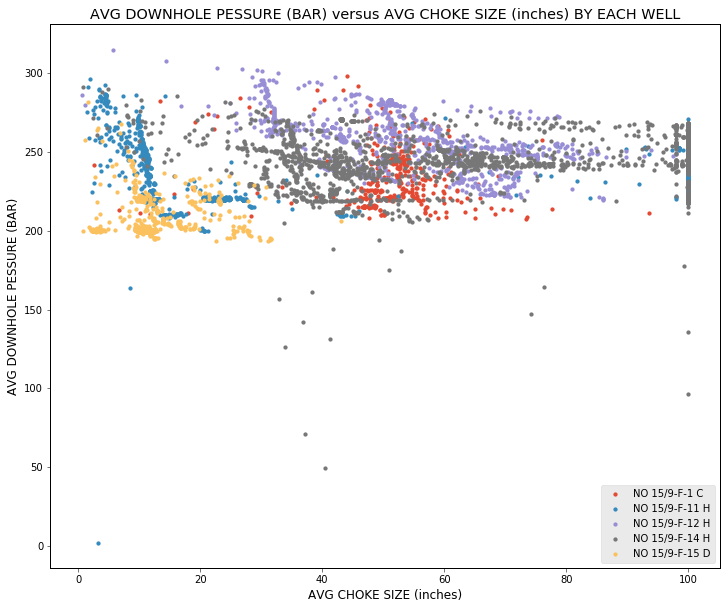

In [353]:
#Plot downhole pressure versus 'AVG_CHOKE_SIZE_P' - By Each Well

plt.subplots(figsize=(12,10),facecolor='white')

ax = plt.axes()
ax.set_facecolor("white")

for well in array_wells:
    df_well = data.loc[data['WELL_BORE_CODE']==well]
    plt.scatter(df_well['AVG_CHOKE_SIZE_P'], df_well['AVG_DOWNHOLE_PRESSURE'], label = well, linewidth=2, s = 5)

plt.title('AVG DOWNHOLE PESSURE (BAR) versus AVG CHOKE SIZE (inches) BY EACH WELL',color='black')
plt.ylabel('AVG DOWNHOLE PESSURE (BAR)',color='black')
plt.xlabel('AVG CHOKE SIZE (inches)',color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.legend(loc='lower right')
plt.rc('axes',edgecolor='black')

plt.savefig('chokes_each_well.png')

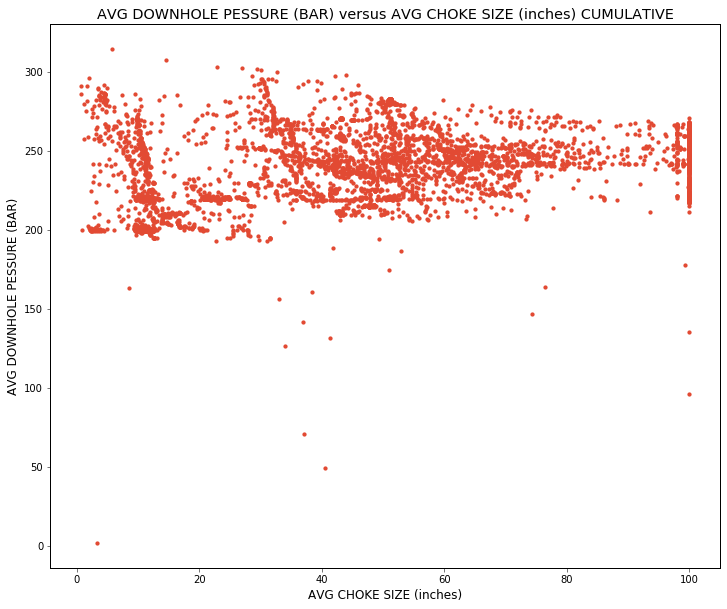

In [354]:
#Plot downhole pressure versus 'AVG_CHOKE_SIZE_P' - All wells

plt.subplots(figsize=(12,10),facecolor='white')

ax = plt.axes()
ax.set_facecolor("white")

plt.scatter(data['AVG_CHOKE_SIZE_P'], data['AVG_DOWNHOLE_PRESSURE'], linewidth=2, s = 5)
plt.title('AVG DOWNHOLE PESSURE (BAR) versus AVG CHOKE SIZE (inches) CUMULATIVE',color='black')
plt.ylabel('AVG DOWNHOLE PESSURE (BAR)',color='black')
plt.xlabel('AVG CHOKE SIZE (inches)',color='black')
plt.xticks(color='black')
plt.yticks(color='black')
#plt.legend(loc='lower right')
plt.rc('axes',edgecolor='black')

plt.savefig('chokes_all_well.png')

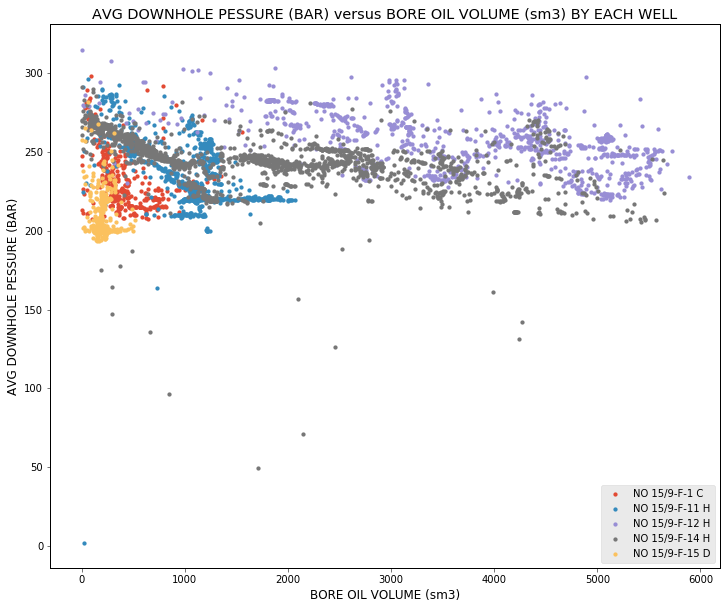

In [355]:
#Plot downhole pressure versus 'BORE_OIL_VOL' - By Each Well

plt.subplots(figsize=(12,10),facecolor='white')

ax = plt.axes()
ax.set_facecolor("white")

for well in array_wells:
    df_well = data.loc[data['WELL_BORE_CODE']==well]
    plt.scatter(df_well['BORE_OIL_VOL'], df_well['AVG_DOWNHOLE_PRESSURE'], label = well, linewidth=2, s = 5)

plt.title('AVG DOWNHOLE PESSURE (BAR) versus BORE OIL VOLUME (sm3) BY EACH WELL',color='black')
plt.ylabel('AVG DOWNHOLE PESSURE (BAR)',color='black')
plt.xlabel('BORE OIL VOLUME (sm3)',color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.legend(loc='lower right')
plt.rc('axes',edgecolor='black')

plt.savefig('oil_each_well.png')

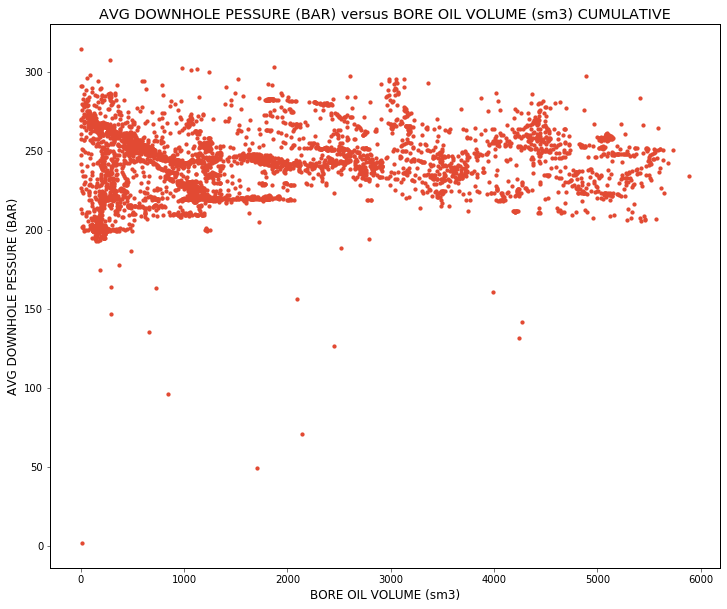

In [356]:
#Plot downhole pressure versus 'BORE_OIL_VOL' - All wells

plt.subplots(figsize=(12,10),facecolor='white')

ax = plt.axes()
ax.set_facecolor("white")

plt.scatter(data['BORE_OIL_VOL'], data['AVG_DOWNHOLE_PRESSURE'], linewidth=2, s = 5)
plt.title('AVG DOWNHOLE PESSURE (BAR) versus BORE OIL VOLUME (sm3) CUMULATIVE',color='black')
plt.ylabel('AVG DOWNHOLE PESSURE (BAR)',color='black')
plt.xlabel('BORE OIL VOLUME (sm3)',color='black')
plt.xticks(color='black')
plt.yticks(color='black')
#plt.legend(loc='lower right')
plt.rc('axes',edgecolor='black')

plt.savefig('oil_all_well.png')

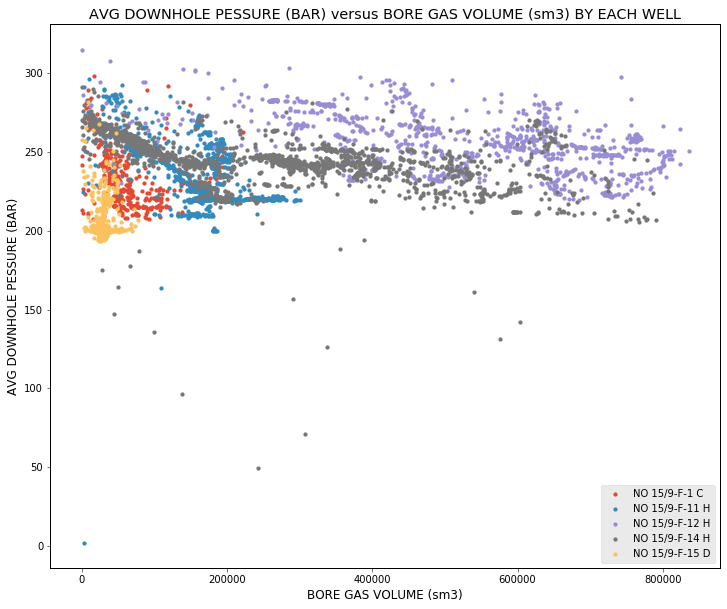

In [357]:
#Plot downhole pressure versus 'BORE_GAS_VOL' - By Each Well

plt.subplots(figsize=(12,10),facecolor='white')

ax = plt.axes()
ax.set_facecolor("white")

for well in array_wells:
    df_well = data.loc[data['WELL_BORE_CODE']==well]
    plt.scatter(df_well['BORE_GAS_VOL'], df_well['AVG_DOWNHOLE_PRESSURE'], label = well, linewidth=2, s = 5)

plt.title('AVG DOWNHOLE PESSURE (BAR) versus BORE GAS VOLUME (sm3) BY EACH WELL',color='black')
plt.ylabel('AVG DOWNHOLE PESSURE (BAR)',color='black')
plt.xlabel('BORE GAS VOLUME (sm3)',color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.legend(loc='lower right')
plt.rc('axes',edgecolor='black')

plt.savefig('gas_each_well.png')

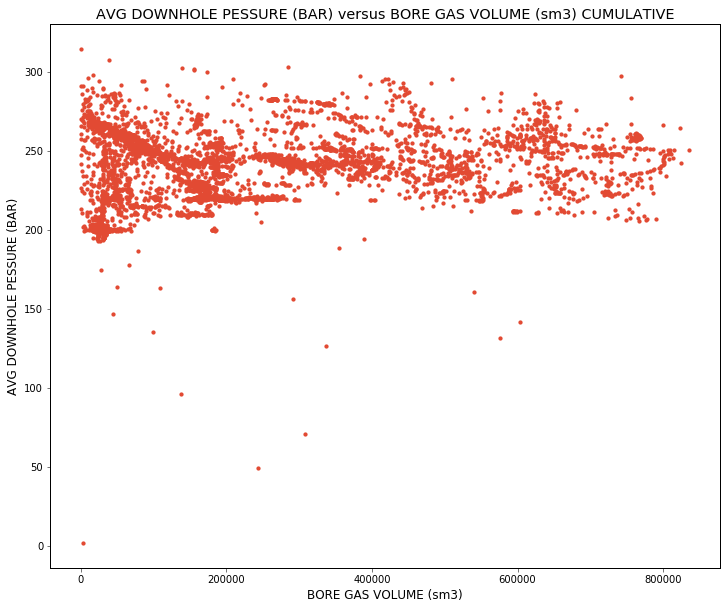

In [358]:
#Plot downhole pressure versus 'BORE_OIL_VOL' - All wells

plt.subplots(figsize=(12,10),facecolor='white')

ax = plt.axes()
ax.set_facecolor("white")

plt.scatter(data['BORE_GAS_VOL'], data['AVG_DOWNHOLE_PRESSURE'], linewidth=2, s = 5)
plt.title('AVG DOWNHOLE PESSURE (BAR) versus BORE GAS VOLUME (sm3) CUMULATIVE',color='black')
plt.ylabel('AVG DOWNHOLE PESSURE (BAR)',color='black')
plt.xlabel('BORE GAS VOLUME (sm3)',color='black')
plt.xticks(color='black')
plt.yticks(color='black')
#plt.legend(loc='lower right')
plt.rc('axes',edgecolor='black')

plt.savefig('gas_all_well.png')